## Bootcamp | Project 4.4 | Veri Temizligi | Asiri Degerler

In [1]:
import numpy as np
import pandas as pd
import array as arr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
from scipy.stats import norm
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("states_all.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1715 entries, 1992_ALABAMA to 2019_WYOMING
Data columns (total 24 columns):
STATE                           1715 non-null object
YEAR                            1715 non-null int64
ENROLL                          1224 non-null float64
TOTAL_REVENUE                   1275 non-null float64
FEDERAL_REVENUE                 1275 non-null float64
STATE_REVENUE                   1275 non-null float64
LOCAL_REVENUE                   1275 non-null float64
TOTAL_EXPENDITURE               1275 non-null float64
INSTRUCTION_EXPENDITURE         1275 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1275 non-null float64
OTHER_EXPENDITURE               1224 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1275 non-null float64
GRADES_PK_G                     1542 non-null float64
GRADES_KG_G                     1632 non-null float64
GRADES_4_G                      1632 non-null float64
GRADES_8_G                      1632 non-null float64
GRADES_12_G       

In [3]:
df.head(3)

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,
1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN


In [4]:
df.isnull().head()


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,
1992_ALABAMA,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
1992_ALASKA,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,True,True,True
1992_ARIZONA,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
1992_ARKANSAS,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
1992_CALIFORNIA,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


In [5]:
df.isnull().sum()*100/df.shape[0]

STATE                            0.000000
YEAR                             0.000000
ENROLL                          28.629738
TOTAL_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
STATE_REVENUE                   25.655977
LOCAL_REVENUE                   25.655977
TOTAL_EXPENDITURE               25.655977
INSTRUCTION_EXPENDITURE         25.655977
SUPPORT_SERVICES_EXPENDITURE    25.655977
OTHER_EXPENDITURE               28.629738
CAPITAL_OUTLAY_EXPENDITURE      25.655977
GRADES_PK_G                     10.087464
GRADES_KG_G                      4.839650
GRADES_4_G                       4.839650
GRADES_8_G                       4.839650
GRADES_12_G                      4.839650
GRADES_1_8_G                    40.524781
GRADES_9_12_G                   37.551020
GRADES_ALL_G                     4.839650
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62.099125
AVG_READING_8_SCORE             67

In [6]:
df.loc[:,'TOTAL_REVENUE'].fillna(df.loc[:,'TOTAL_REVENUE'].interpolate(),inplace=True) 
df.loc[:,'TOTAL_EXPENDITURE'].fillna(df.loc[:,'TOTAL_EXPENDITURE'].interpolate(),inplace=True) 
df.isnull().sum()*100/df.count()

STATE                             0.000000
YEAR                              0.000000
ENROLL                           40.114379
TOTAL_REVENUE                     0.000000
FEDERAL_REVENUE                  34.509804
STATE_REVENUE                    34.509804
LOCAL_REVENUE                    34.509804
TOTAL_EXPENDITURE                 0.000000
INSTRUCTION_EXPENDITURE          34.509804
SUPPORT_SERVICES_EXPENDITURE     34.509804
OTHER_EXPENDITURE                40.114379
CAPITAL_OUTLAY_EXPENDITURE       34.509804
GRADES_PK_G                      11.219196
GRADES_KG_G                       5.085784
GRADES_4_G                        5.085784
GRADES_8_G                        5.085784
GRADES_12_G                       5.085784
GRADES_1_8_G                     68.137255
GRADES_9_12_G                    60.130719
GRADES_ALL_G                      5.085784
AVG_MATH_4_SCORE                203.539823
AVG_MATH_8_SCORE                184.883721
AVG_READING_4_SCORE             163.846154
AVG_READING

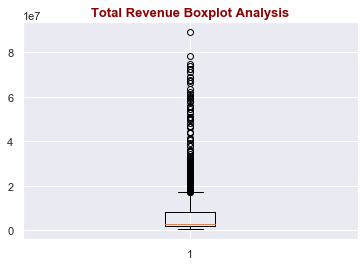

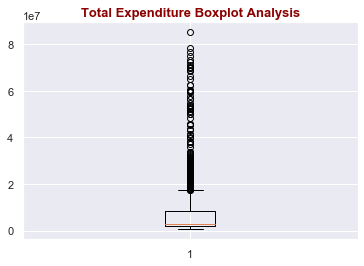

In [7]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
plt.boxplot(df["TOTAL_REVENUE"], whis=1.5) 
plt.title("Total Revenue Boxplot Analysis",fontdict=baslik_font)
plt.show()
plt.boxplot(df["TOTAL_EXPENDITURE"], whis=1.5) 
plt.title("Total Expenditure Boxplot Analysis",fontdict=baslik_font)
plt.show()

In [8]:
from scipy.stats.mstats import winsorize 
winsorize_revenue = winsorize(df["TOTAL_REVENUE"], (0, 0.15))
winsorize_revenue


masked_array(data=[2678885., 1049591., 3258079., ..., 2044669., 2044669.,
                   2044669.],
             mask=False,
       fill_value=1e+20)

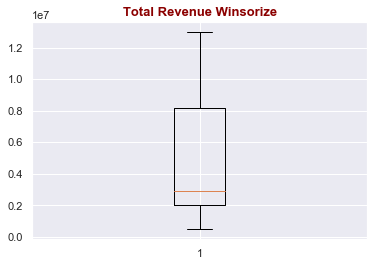

In [9]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
plt.boxplot(winsorize_revenue)
plt.title("Total Revenue Winsorize",fontdict=baslik_font)
plt.show()

In [10]:
winsorize_expenditure = winsorize(df["TOTAL_EXPENDITURE"], (0, 0.15))
winsorize_expenditure

masked_array(data=[2653798.,  972488., 3401580., ..., 2034229., 2034229.,
                   2034229.],
             mask=False,
       fill_value=1e+20)

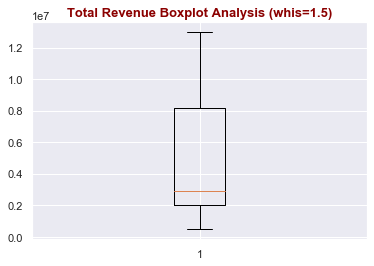

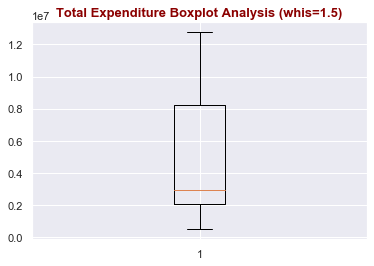

In [11]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
plt.boxplot(winsorize_revenue) 
plt.title("Total Revenue Boxplot Analysis (whis=1.5)",fontdict=baslik_font)
plt.show()
plt.boxplot(winsorize_expenditure) 
plt.title("Total Expenditure Boxplot Analysis (whis=1.5)",fontdict=baslik_font)
plt.show()

In [13]:
df['TOTAL_DEFICIT']=df.loc[:,'TOTAL_EXPENDITURE']-df.loc[:,'TOTAL_REVENUE'] 
df['TOTAL_DEFICIT']

PRIMARY_KEY
1992_ALABAMA          -25087.0
1992_ALASKA           -77103.0
1992_ARIZONA          143501.0
1992_ARKANSAS          31063.0
1992_CALIFORNIA       878807.0
                        ...   
2019_VIRGINIA         -10440.0
2019_WASHINGTON       -10440.0
2019_WEST_VIRGINIA    -10440.0
2019_WISCONSIN        -10440.0
2019_WYOMING          -10440.0
Name: TOTAL_DEFICIT, Length: 1715, dtype: float64

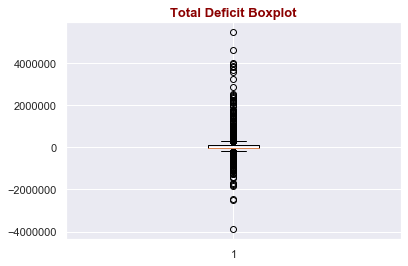

In [14]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
plt.boxplot(df['TOTAL_DEFICIT']) 
plt.title("Total Deficit Boxplot",fontdict=baslik_font)
plt.show()

In [15]:
winsorize_deficit = winsorize(df["TOTAL_DEFICIT"], (0, 0.15))
winsorize_deficit

masked_array(data=[-25087., -77103., 143501., ..., -10440., -10440.,
                   -10440.],
             mask=False,
       fill_value=1e+20)

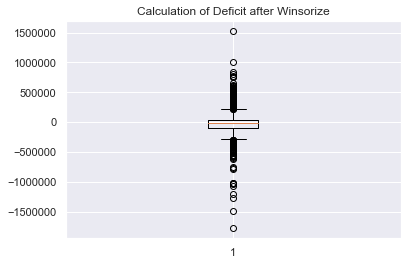

In [19]:
winsorize_win_deficit=winsorize_expenditure-winsorize_revenue 
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
plt.boxplot(winsorize_win_deficit)
plt.title("Calculation of Deficit after Winsorize")
plt.show()